<a href="https://colab.research.google.com/github/zyin36/MAT-422/blob/main/hw_3_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means

We start with a concept called **clustering**, which is a form of *unsupervised
learning*. As its name suggests, it groups similar items together.

**K-means** is the most commonly used clustering algorithm.

### **Pseudocode** ([from Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering))


```
def k_means_cluster(k, points):
    # Initialization: choose k centroids (Forgy, Random Partition, etc.)
    centroids = [c1, c2, ..., ck]
    
    # Initialize clusters list
    clusters = [[] for _ in range(k)]
    
    # Loop until convergence
    converged = false
    while not converged:
        # Clear previous clusters
        clusters = [[] for _ in range(k)]
    
        # Assign each point to the "closest" centroid
        for point in points:
            distances_to_each_centroid = [distance(point, centroid) for centroid in centroids]
            cluster_assignment = argmin(distances_to_each_centroid)
            clusters[cluster_assignment].append(point)
        
        # Calculate new centroids
        #   (the standard implementation uses the mean of all points in a
        #     cluster to determine the new centroid)
        new_centroids = [calculate_centroid(cluster) for cluster in clusters]
        
        converged = (new_centroids == centroids)
        centroids = new_centroids
        
        if converged:
            return clusters
```

Initialization ("Forgy"):

** "Cluster centroid": The central data point of a cluster.* <br/>
We could select $k$ random data points as our centroids, but the question is - how do we know what value to use for $k$?
  - Elbow method: Plot the average squared distance within a cluster ($y$, inertia) against k ($x$). Select the point after which $y$ starts decreasing in a linear fashion.


### **References**
  - https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
  - Slides from CSE472 - Social Media Mining (https://www.socialmediamining.info/)





## Support Vector Machine
- "A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space." (IBM, 2023)

- We will use the Breast cancer wisconsin (diagnostic) dataset from sklearn.

### **References**
  - https://www.ibm.com/topics/support-vector-machine

### 2-Dimensional Example (Polynomial)

Accuracy: 89.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        47
           1       0.91      0.91      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


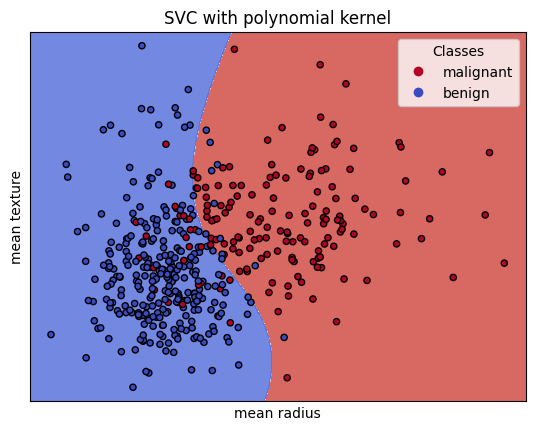

In [40]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(data, target) = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

data = data[['mean radius', 'mean texture']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) # 20% as test data

model = svm.SVC(kernel='poly')  # polynomial
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", class_report)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# Create a meshgrid for plotting
X0, X1 = X_train['mean radius'], X_train['mean texture']
xx, yy = make_meshgrid(X0, X1)

# Plot the decision boundary and training data
fig, ax = plt.subplots()
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # using the trained model, get prediction for every coordinate
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.8) # fit contour

scatter = ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
# Add legend with class labels
ax.legend(handles=scatter.legend_elements()[0],
           labels=['malignant', 'benign'],
           title="Classes")

ax.set_xlabel('mean radius')
ax.set_ylabel('mean texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with polynomial kernel')
plt.show()


### 2-Dimensional Example (Linear)



Accuracy: 89.47%
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.90      0.93      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


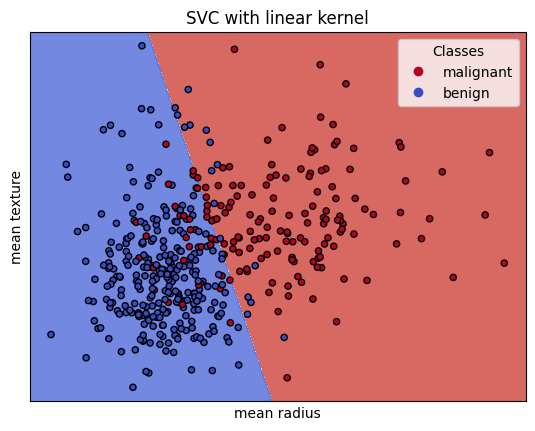

In [41]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(data, target) = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

data = data[['mean radius', 'mean texture']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) # 20% as test data

model = svm.SVC(kernel='linear')  # linear
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", class_report)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# Create a meshgrid for plotting
X0, X1 = X_train['mean radius'], X_train['mean texture']
xx, yy = make_meshgrid(X0, X1)

# Plot the decision boundary and training data
fig, ax = plt.subplots()
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # using the trained model, get prediction for every coordinate
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.8) # fit contour

scatter = ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
# Add legend with class labels
ax.legend(handles=scatter.legend_elements()[0],
           labels=['malignant', 'benign'],
           title="Classes")

ax.set_xlabel('mean radius')
ax.set_ylabel('mean texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with linear kernel')
plt.show()


### 2-Dimensional Example (RBF)

Accuracy: 87.72%
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84        47
           1       0.87      0.93      0.90        67

    accuracy                           0.88       114
   macro avg       0.88      0.87      0.87       114
weighted avg       0.88      0.88      0.88       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


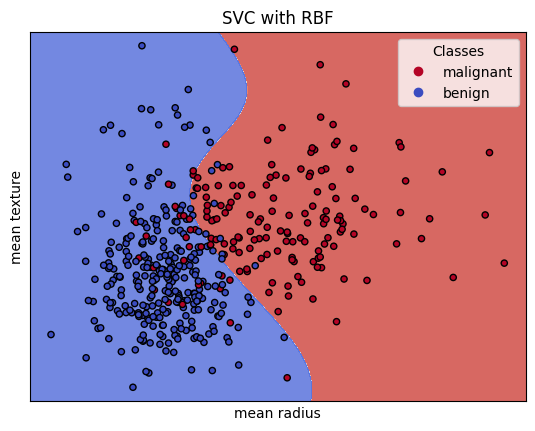

In [42]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(data, target) = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

data = data[['mean radius', 'mean texture']]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) # 20% as test data

model = svm.SVC(kernel='rbf')  # RBF
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", class_report)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


# Create a meshgrid for plotting
X0, X1 = X_train['mean radius'], X_train['mean texture']
xx, yy = make_meshgrid(X0, X1)

# Plot the decision boundary and training data
fig, ax = plt.subplots()
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # using the trained model, get prediction for every coordinate
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm_r, alpha=0.8) # fit contour

scatter = ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm_r, s=20, edgecolors='k')
# Add legend with class labels
ax.legend(handles=scatter.legend_elements()[0],
           labels=['malignant', 'benign'],
           title="Classes")

ax.set_xlabel('mean radius')
ax.set_ylabel('mean texture')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('SVC with RBF')
plt.show()

We can see that, with the two features, "poly" and "linear" kernel produced results with the same accuracy, while "rbf" produced a slightly less accurate result.

### Using all features

In [46]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(data, target) = datasets.load_breast_cancer(as_frame=True, return_X_y=True)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0) # 20% as test data


def eval(X_train, X_test, y_train, y_test, kernel_str):
  model = svm.SVC(kernel=kernel_str)
  model.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = model.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  # Display results
  print(kernel_str)
  print(f"Accuracy: {accuracy * 100:.2f}%")
  print("Classification Report:\n", class_report)


eval(X_train, X_test, y_train, y_test, 'linear')
eval(X_train, X_test, y_train, y_test, 'poly')
eval(X_train, X_test, y_train, y_test, 'rbf')


linear
Accuracy: 95.61%
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

poly
Accuracy: 91.23%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88        47
           1       0.88      0.99      0.93        67

    accuracy                           0.91       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.91      0.91       114

rbf
Accuracy: 92.98%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        47
           1       0.90      0.99      0.94        67

    accuracy                           0.93